In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_used_cars=pd.read_csv('autos.csv',encoding='latin-1')

After loading the dataset, we will first explore the features and get rid of clearly useless columns

In [31]:
#split the dataset into training and testing 70% vs 30%
RS1=np.random.RandomState(1)
msk1=RS1.rand(len(raw_used_cars['name']))<=0.7
raw_train_used_cars=raw_used_cars.iloc[msk1]
raw_test_used_cars=raw_used_cars.iloc[~msk1]

In [32]:
raw_train_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260029 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            260029 non-null object
name                   260029 non-null object
seller                 260029 non-null object
offerType              260029 non-null object
price                  260029 non-null int64
abtest                 260029 non-null object
vehicleType            233396 non-null object
yearOfRegistration     260029 non-null int64
gearbox                245800 non-null object
powerPS                260029 non-null int64
model                  245631 non-null object
kilometer              260029 non-null int64
monthOfRegistration    260029 non-null int64
fuelType               236410 non-null object
brand                  260029 non-null object
notRepairedDamage      209289 non-null object
dateCreated            260029 non-null object
nrOfPictures           260029 non-null int64
postalCode             260029 non-null int64
lastSeen              

In [33]:
raw_train_used_cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.600290e+05,260029.000000,260029.000000,260029.000000,260029.000000,260029.0,260029.000000
mean,1.899739e+04,2004.587877,115.564814,125659.138019,5.729899,0.0,50847.378339
std,4.256372e+06,93.747958,191.816212,40081.060666,3.714780,0.0,25832.537172
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30457.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49638.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71638.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [34]:
cat= raw_train_used_cars.columns[raw_train_used_cars.dtypes==object]
for i in cat:
    print(i,' has {} unique categories'.format(len(set(raw_train_used_cars[i]))))

dateCrawled  has 214357 unique categories
name  has 170347 unique categories
seller  has 2 unique categories
offerType  has 2 unique categories
abtest  has 2 unique categories
vehicleType  has 9 unique categories
gearbox  has 3 unique categories
model  has 251 unique categories
fuelType  has 8 unique categories
brand  has 40 unique categories
notRepairedDamage  has 3 unique categories
dateCreated  has 106 unique categories
lastSeen  has 140758 unique categories


We can first get rid of categorical columns that are clearly not helpful.

In [54]:
del_var=['dateCrawled', 'name', 'abtest', 'dateCreated', 'nrOfPictures', 'lastSeen','postalCode']
train_used_cars = raw_train_used_cars.drop(labels=del_var,axis=1)

Then further look into the categorical features 'offerType'

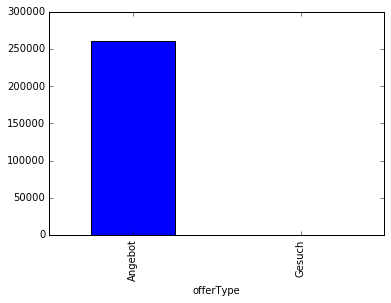

In [39]:
train_used_cars.groupby('offerType').count()['price'].plot(kind = 'bar')
plt.show()

From the plot above, we can see that the Gesuch type in the offerType feature is too rate to be useful, so we get delete it as well.

In [40]:
del_var=['dateCrawled', 'name', 'offerType', 'abtest', 'dateCreated', 'nrOfPictures', 'lastSeen']
train_used_cars = raw_train_used_cars.drop(labels=del_var,axis=1)

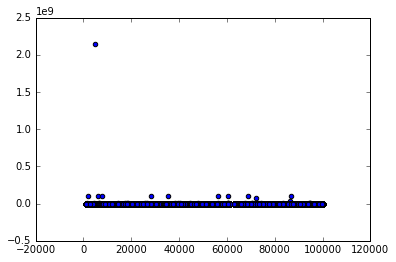

In [41]:
plt.scatter(train_used_cars['postalCode'],train_used_cars['price'])
plt.show()

Then we will further examine features that are in numeric format and its relation with the target variable

In [42]:
price = train_used_cars['price']
YoR = train_used_cars['yearOfRegistration']
PPS = train_used_cars['powerPS']
KLM = train_used_cars['kilometer']
MoR= train_used_cars['monthOfRegistration']

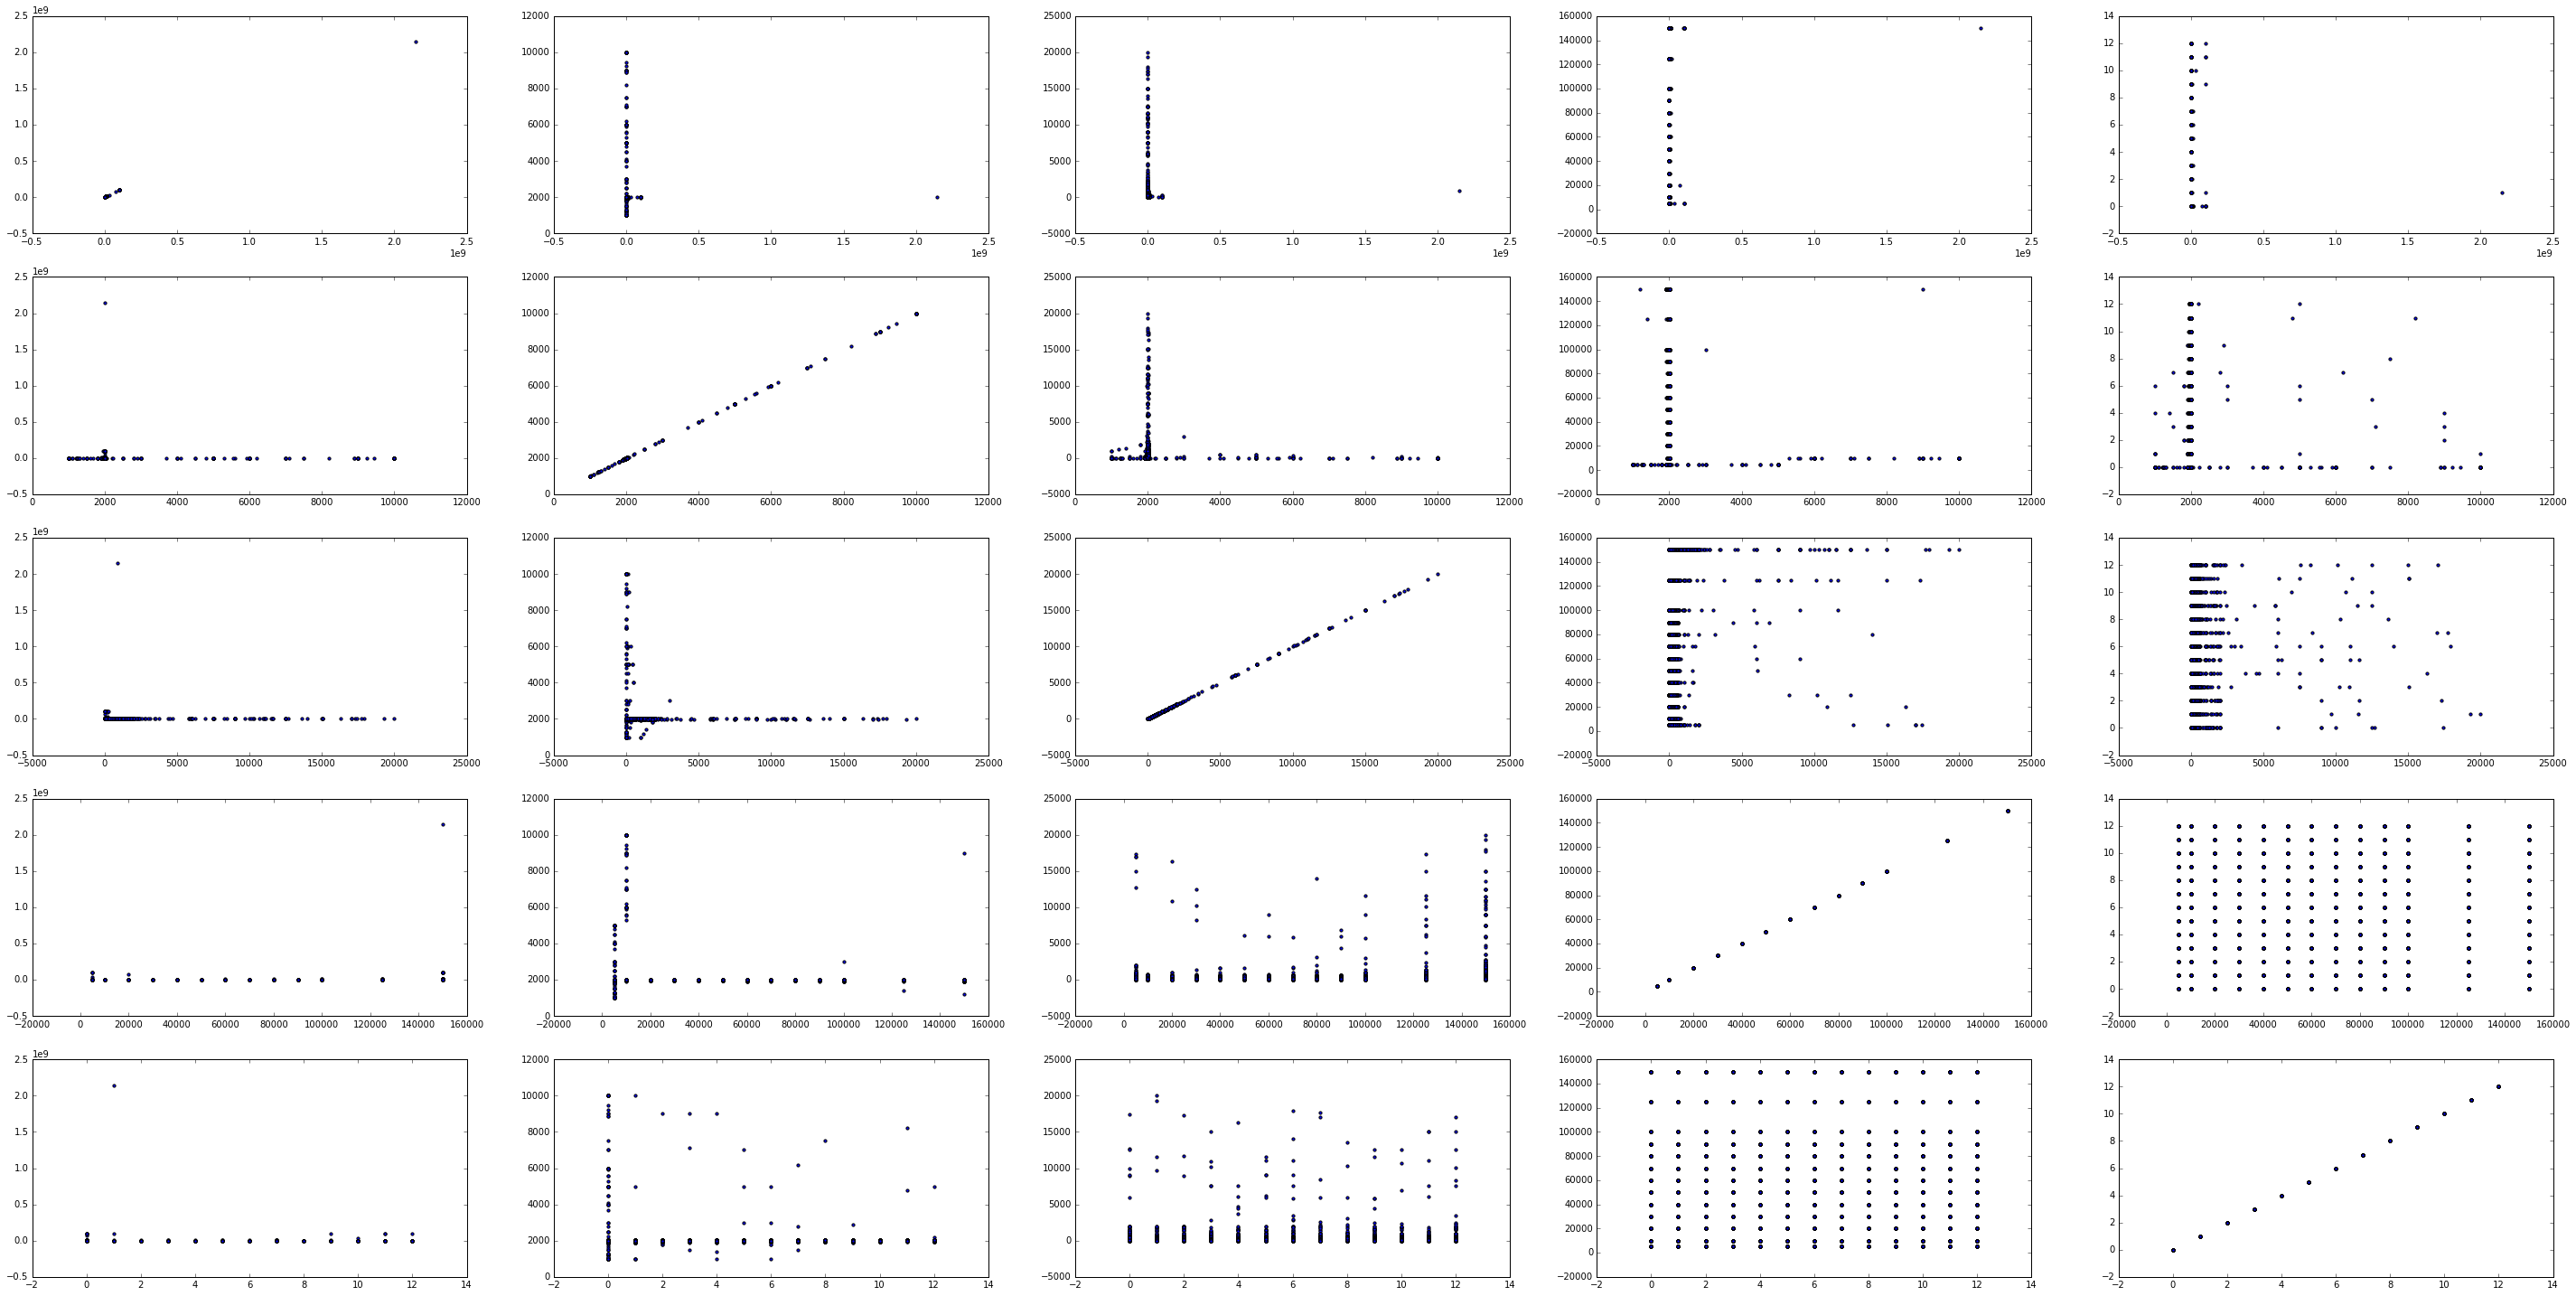

In [43]:
dlist = [price, YoR, PPS, KLM, MoR]
fig, axe = plt.subplots(5, 5)
fig.set_size_inches(50, 25)
for m in range(5):
    for n in range(5):
        axe[m,n].scatter(dlist[m], dlist[n], s = 10)
plt.show()

From the above plots, we can see that there are lots of outliers in the dataset which make the pattern hard to see. So we further explore each features trying to filter out noise and outliers.

In [44]:
train_used_cars.isnull().sum()

seller                     0
price                      0
vehicleType            26633
yearOfRegistration         0
gearbox                14229
powerPS                    0
model                  14398
kilometer                  0
monthOfRegistration        0
fuelType               23619
brand                      0
notRepairedDamage      50740
postalCode                 0
dtype: int64

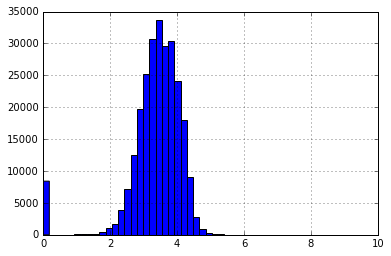

In [47]:
price_vis = np.log10(train_used_cars['price'])
price_vis[train_used_cars['price'] == 0]  = 0
price_vis.hist(bins = 50)
plt.show()

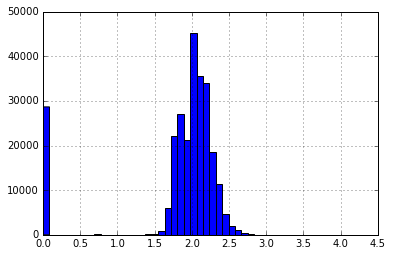

In [48]:
power_vis = np.log10(train_used_cars['powerPS'])
power_vis[train_used_cars['powerPS'] == 0]  = 0
power_vis.hist(bins = 50)
plt.show()

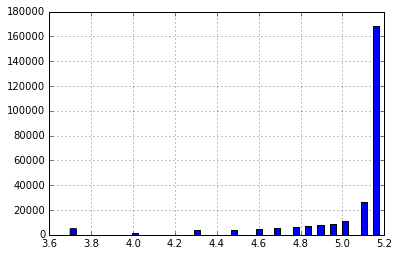

In [49]:
km_vis = np.log10(train_used_cars['kilometer'])
km_vis[train_used_cars['kilometer'] == 0]  = 0
km_vis.hist(bins = 50)
plt.show()

Based on the plots above, we decided on the following criteria for getting rid of outliers

In [50]:
clean_train_used_cars = train_used_cars[(train_used_cars['price']>100) & (train_used_cars['price']<150000)&
                (train_used_cars['yearOfRegistration']>1950) & (train_used_cars['yearOfRegistration']<2017)&
                (train_used_cars['powerPS']>10)&(train_used_cars['powerPS']<500) & (train_used_cars['monthOfRegistration'] < 12.5)]
train_used_cars.info()
clean_train_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260029 entries, 0 to 371527
Data columns (total 13 columns):
seller                 260029 non-null object
price                  260029 non-null int64
vehicleType            233396 non-null object
yearOfRegistration     260029 non-null int64
gearbox                245800 non-null object
powerPS                260029 non-null int64
model                  245631 non-null object
kilometer              260029 non-null int64
monthOfRegistration    260029 non-null int64
fuelType               236410 non-null object
brand                  260029 non-null object
notRepairedDamage      209289 non-null object
postalCode             260029 non-null int64
dtypes: int64(6), object(7)
memory usage: 27.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217087 entries, 2 to 371527
Data columns (total 13 columns):
seller                 217087 non-null object
price                  217087 non-null int64
vehicleType            209478 non-null objec

From the above data, we can see that we filtered out about 60 k data points at outliers which is about 15% of the total data set.

In [51]:
clean_price = clean_train_used_cars['price']
clean_YoR = clean_train_used_cars['yearOfRegistration']
clean_PPS = clean_train_used_cars['powerPS']
clean_KLM = clean_train_used_cars['kilometer']
clean_MoR= clean_train_used_cars['monthOfRegistration']

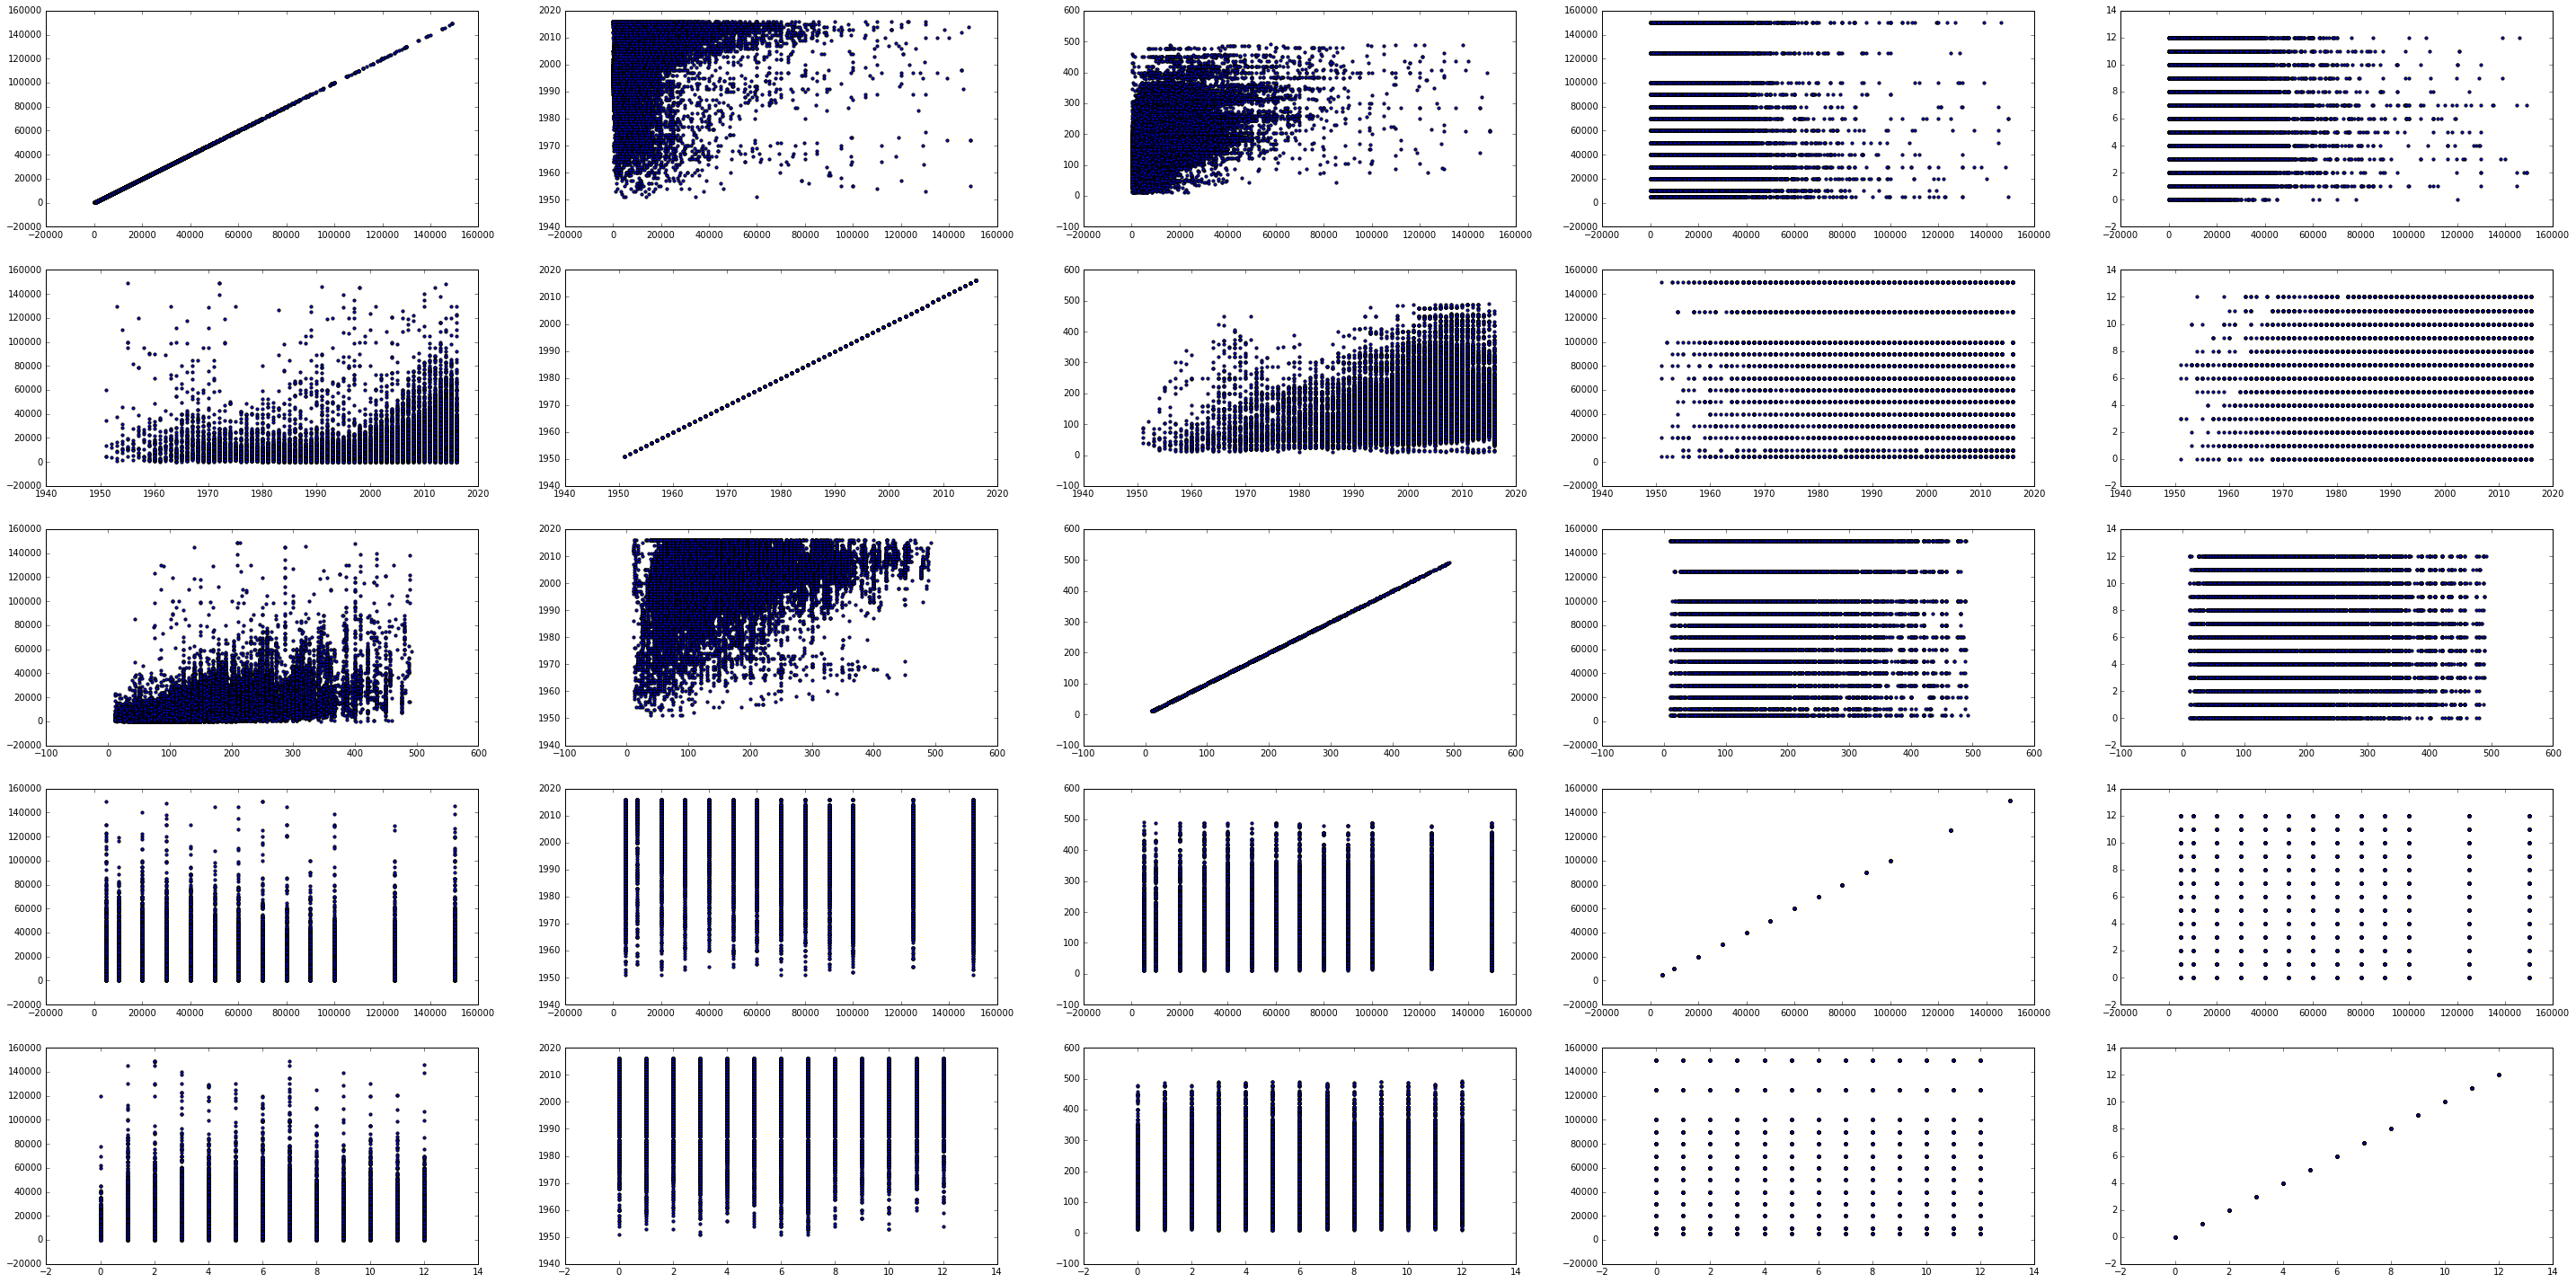

In [52]:
dlist = [clean_price, clean_YoR, clean_PPS,clean_KLM, clean_MoR]
fig, axe = plt.subplots(5, 5)
fig.set_size_inches(50, 25)
for m in range(5):
    for n in range(5):
        axe[m,n].scatter(dlist[m], dlist[n], s = 10)
plt.show()

Risks:

Data:
1.Due to limited size of our customer, it might be a biased sample of the overall market
2.Due to practical reasons, our customers might be incentivzed to report fake data. etc reporting low price for tax purpose

Deployment:
1.Feature engieering is still naive. In deployment, more engieering is needed. Ie. we are using registration year as a feature which indicates how old the car is. But a car registered in 2013 could be yonger than the car registered in 2015 if it got sold right after registration due to certain reason.
2.As shown in the dynamic update version of our model, the prediction power of the model could vary over different batches. As a result, if there is sudden change in the marke, the updated model may not be able to capture the new changes and as a result leading to increasing error after certain update. Thus it potentially will cause risk for our business when we rely on the model.